This Model aims to predict the stock price of Coca Cola based on various economic and consumer dynamic factors by finding out the Principle components and using Support Vector Regression 

Data courtesy: Yahoo Finance and FRED (Federal Reserve Bank of St. Louis)

Using the yfinance library to retrieve historical stock data for Coca-Cola (KO) and then resampling it to a quarterly frequency.

In [2]:
import yfinance as yf
from datetime import datetime

# Define the stock symbol (KO for Coca-Cola)
symbol = "KO"

# Create a Ticker object for Coca-Cola
ko = yf.Ticker(symbol)

# Define custom start date and end date
start_date = '2012-12-31'
end_date = datetime.today()

# Get daily data for the specified date range
data = ko.history(start=start_date, end=end_date, interval="3mo")

# Resample to quarterly frequency (end of quarter)
quarterly_data = data.resample('Q').last()

# Reset the index to make the 'Date' column a regular column
quarterly_data = quarterly_data.reset_index()

# Print the DataFrame with the 'Date' column
quarterly_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-12-31 00:00:00-05:00,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0
1,2013-03-31 00:00:00-04:00,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0
2,2013-06-30 00:00:00-04:00,28.703749,29.982664,27.158991,27.432018,863530400,0.28,0.0
3,2013-09-30 00:00:00-04:00,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0
4,2013-12-31 00:00:00-05:00,29.426350,30.372984,27.070775,28.032085,975777300,0.00,0.0


 it will display the first few rows of the quarterly_data DataFrame containing the quarterly stock data for Coca-Cola.

In [3]:
quarterly_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-12-31 00:00:00-05:00,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0
1,2013-03-31 00:00:00-04:00,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0
2,2013-06-30 00:00:00-04:00,28.703749,29.982664,27.158991,27.432018,863530400,0.28,0.0
3,2013-09-30 00:00:00-04:00,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0
4,2013-12-31 00:00:00-05:00,29.426350,30.372984,27.070775,28.032085,975777300,0.00,0.0


Using the to_csv method, you're exporting the quarterly_data DataFrame to a CSV file named coca_cola_time_series_data.csv

In [4]:
# export data to csv file
quarterly_data.to_csv('coca_cola_time_series_data.csv')

This code snippet fetches data for Consumer Spending from the FRED API and stores it in the consumer_spending DataFrame. If you run this code, you'll see the first few rows of the data.

In [5]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

# Define the series code for Consumer Spending (PCE)
series_code = 'PCE'

# Define the start and end dates for the past 10 years
# Define custom start date and end date
start_date = '2012-09-30'
end_date = datetime.today()

# Retrieve data from FRED API
consumer_spending = pdr.get_data_fred(series_code, start_date, end_date)

consumer_spending.head()

,PCE
DATE,
2012-10-01,11137.4
2012-11-01,11178.4
2012-12-01,11181.2
2013-01-01,11252.4
2013-02-01,11290.5


Fetches economic data from the FRED API for various indicators, resamples it to quarterly frequency, combines it into a single DataFrame, and then saves it to a CSV file.

In [6]:
import pandas_datareader as pdr
from datetime import datetime

# Define series codes and corresponding names
economic_data = [
    {'code': 'PCE', 'name': 'Consumer Spending'},
    {'code': 'GDPC1', 'name': 'GDP Growth'},
    {'code': 'CPIAUCNS', 'name': 'Inflation Rate'},
    {'code': 'GS10', 'name': 'Interest Rates'},
    {'code': 'UNRATE', 'name': 'Unemployment Rate'}
]

# Define the start and end dates for the past 10 years
start_date = '2012-09-30'
end_date = '2023-09-01'

# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Loop through the economic data list
for item in economic_data:
    # Retrieve data from FRED API
    data = pdr.get_data_fred(item['code'], start_date, end_date)
    
    # Resample data to quarterly frequency (taking the last value of each quarter)
    data = data.resample('Q').last()
    
    # Rename columns to include the economic indicator name
    data = data.rename(columns={'value': item['name']})
    
    # Merge data with existing combined_data DataFrame
    combined_data = pd.concat([combined_data, data], axis=1)

# Add the date column to the data
combined_data['Date'] = combined_data.index

combined_data.reset_index

# Save the combined data to a CSV file
combined_data.to_csv('economic_data_with_single_date_column_quarterly.csv', index=False)


Display Date column from quarterly_data

In [7]:
quarterly_data["Date"].head()

0   2012-12-31 00:00:00-05:00
1   2013-03-31 00:00:00-04:00
2   2013-06-30 00:00:00-04:00
3   2013-09-30 00:00:00-04:00
4   2013-12-31 00:00:00-05:00
Name: Date, dtype: datetime64[ns, America/New_York]

Using the apply method along with a lambda function to format the dates in the "Date" column of the quarterly_data DataFrame to a string format in the "mm-dd-yyyy" style.

In [8]:
quarterly_data['Date'] = quarterly_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

Display Date column from quarterly_data

In [9]:
quarterly_data["Date"].head()

0    12-31-2012
1    03-31-2013
2    06-30-2013
3    09-30-2013
4    12-31-2013
Name: Date, dtype: object

Using the apply method along with a lambda function to format the dates in the "Date" column of the combined_data DataFrame to a string format in the "mm-dd-yyyy" style.

In [10]:
combined_data['Date'] = combined_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

Display first five rows of combined_data

In [11]:
combined_data.head()

,PCE,GDPC1,CPIAUCNS,GS10,UNRATE,Date
DATE,,,,,,
2012-12-31,11181.2,17489.852,229.601,1.72,7.9,12-31-2012
2013-03-31,11290.1,17662.400,232.773,1.96,7.5,03-31-2013
2013-06-30,11344.4,17709.671,233.504,2.30,7.5,06-30-2013
2013-09-30,11445.9,17860.450,234.149,2.81,7.2,09-30-2013
2013-12-31,11593.2,18016.147,233.049,2.90,6.7,12-31-2013


Display first five rows of quarterly_data

In [12]:
quarterly_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,12-31-2012,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0
1,03-31-2013,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0
2,06-30-2013,28.703749,29.982664,27.158991,27.432018,863530400,0.28,0.0
3,09-30-2013,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0
4,12-31-2013,29.426350,30.372984,27.070775,28.032085,975777300,0.00,0.0


merged two DataFrames (quarterly_data and combined_data) based on the "Date" column using an inner join.

In [13]:
merged_df = pd.merge(quarterly_data, combined_data, on="Date", how="inner")

# Print the merged DataFrame
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,28.703749,29.982664,27.158991,27.432018,863530400,0.28,0.0,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,27.686739,29.574965,26.644960,29.075777,947889200,0.56,0.0,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,29.426350,30.372984,27.070775,28.032085,975777300,0.00,0.0,11593.2,18016.147,233.049,2.90,6.7


Dropping the following redundant columns from the merged_df

In [14]:
merged_df = merged_df.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])

Display the first five rows of merged_df

In [15]:
merged_df.head()

,Date,Close,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,27.620071,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,28.525991,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,27.432018,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,29.075777,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,28.032085,11593.2,18016.147,233.049,2.90,6.7


Export merged_df to .csv file

In [16]:
merged_df.to_csv("combined quarterly data for regression.csv")

This code performs Principal Component Analysis (PCA) on the standardized features ('PCE', 'GDPC1', 'CPIAUCNS', 'GS10', 'UNRATE') in the dataset. It then identifies the top contributing factors for the first and second principal components.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'df' is your DataFrame containing the data
features = ['PCE', 'GDPC1', 'CPIAUCNS', 'GS10', 'UNRATE']
X = merged_df[features]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Identify top contributing factors for first and second principal components
top_factors_pc1 = features[np.argmax(np.abs(loadings[:,0]))]
top_factors_pc2 = features[np.argmax(np.abs(loadings[:,1]))]

print(f"Top contributing factor for PC1: {top_factors_pc1}")
print(f"Top contributing factor for PC2: {top_factors_pc2}")


Top contributing factor for PC1: PCE
Top contributing factor for PC2: GS10


The above code helps to understand which original features have the highest contribution to the principal components, providing insights into the underlying patterns in the data. In this case PCE and GS10 are the highest contributing factors

This code generates a scatter plot of the first two principal components, along with arrows indicating the variable loadings. 

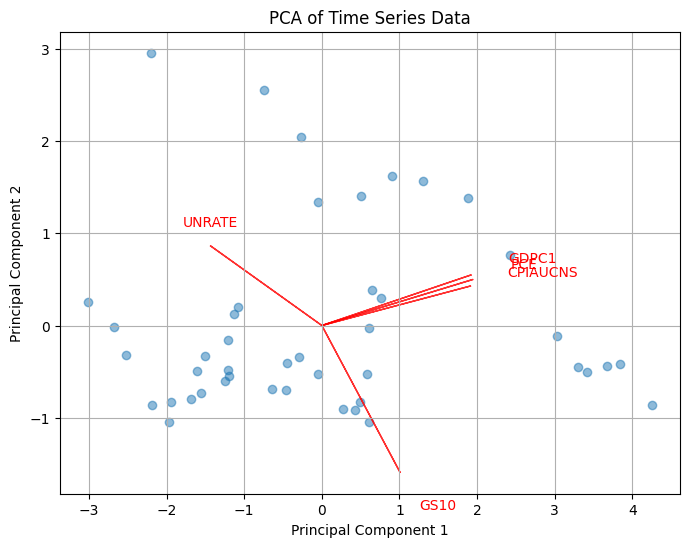

In [18]:
import matplotlib.pyplot as plt

# Assuming 'principal_components' contains the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Time Series Data')
plt.grid(True)

# Add arrows to indicate variable loadings
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2, color='r', alpha=0.8)
    plt.text(loadings[i, 0]*2.5, loadings[i, 1]*2.5, feature, color='r')

plt.show()


The resulting plot will show a scatter of points representing the first two principal components. Arrows and labels indicate the variable loadings, providing insights into which original features contribute most to these components.

This code calculates and prints the explained variance for each principal component, as well as the cumulative explained variance.

In [19]:
# Calculate explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Create a DataFrame to display the results
contribution_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print the DataFrame
print(contribution_df)


   Component  Explained Variance  Cumulative Variance
0          1            0.694270             0.694270
1          2            0.196239             0.890509


By examining this DataFrame, you can gain insights into how much of the total variance is explained by each component and how much is accumulated as you consider more components. This information is valuable for deciding how many components to retain for further analysis.In this case it is two components PCE and GS10. Together they explain 89% variation in Close Price

This code snippet is preparing the data for modeling by splitting it into training and testing sets. It assumes you are using the PCA components 'PCE' and 'GS10' as independent variables, and 'Close' prices as the dependent variable.

In [20]:
from sklearn.model_selection import train_test_split

# Assuming df contains your data
X = merged_df[['PCE', 'GS10']]  # Independent variables (PCA components)
y = merged_df['Close']           # Dependent variable (Close prices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


After executing the above code, you will have X_train, X_test, y_train, and y_test datasets ready for training and evaluating your model. The training set (X_train, y_train) will be used to train the model, while the testing set (X_test, y_test) will be used to evaluate its performance.

This code snippet is an example of using Support Vector Regression (SVR) to predict closing prices using PCA components. It also calculates the Mean Absolute Error (MAE) as an evaluation metric.

This code provides an example of how to train an SVR model on PCA components and evaluate its performance using MAE.

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing sets
# 'X_train' and 'X_test' should contain PCA1 and PCA2 values

# Initialize SVR model
svr_model = SVR(kernel='poly', C=3.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train, y_train)

# Predict closing prices
y_pred = svr_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) as an example of evaluation metric
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 2.3392049028789894


This code generates a scatter plot comparing actual closing prices with predicted closing prices. It also includes a red dashed line representing a perfect one-to-one relationship between actual and predicted values.

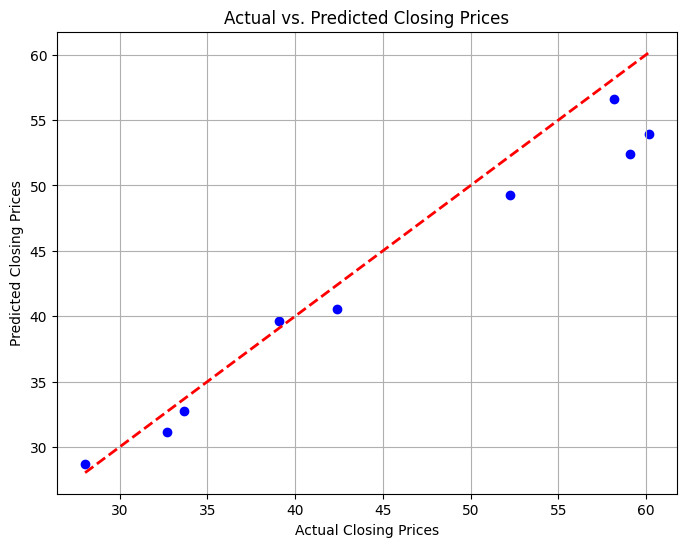

In [23]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains actual closing prices and 'y_pred' contains predicted closing prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices')
plt.grid(True)
plt.show()


Using PCA (Principal Component Analysis) in combination with SVR (Support Vector Regression) has its advantages and disadvantages. Here are some pros and cons of this approach:

Pros:

    1. Dimensionality Reduction: PCA helps in reducing the dimensionality of the dataset by transforming the original features into a smaller set of uncorrelated components. This can lead to faster training times and less computational resources required for modeling.

    2. Noise Reduction: PCA aims to capture the underlying structure of the data by identifying the directions with the highest variance. This can help in filtering out noisy features that may not contribute significantly to the prediction.

    3. Interpretability: The principal components can be interpreted in terms of the original features. This allows for a clearer understanding of which features are contributing most to the variance in the data.

    4. Improved Generalization: By reducing noise and irrelevant features, PCA can help improve the generalization of the model, potentially reducing overfitting.

Cons:

    1. Information Loss: PCA involves projecting data onto a lower-dimensional space, which can result in a loss of information. If some of the lower variance components are actually important for the prediction, they may be discarded.

    2. Assumption of Linearity: SVR with PCA assumes linear relationships between the transformed features and the target variable. If the underlying relationships are non-linear, this approach may not perform well.

    3. Parameter Tuning: Choosing the right number of principal components and SVR hyperparameters can be challenging and may require extensive tuning.

    4. Complexity of Implementation: Implementing PCA and SVR together can be more complex than using either technique individually. It requires careful handling of data preprocessing, parameter tuning, and model evaluation.

Considerations:

    1. Data Characteristics: The effectiveness of PCA + SVR depends on the characteristics of the dataset. It may perform exceptionally well in scenarios where there are clear underlying patterns that can be captured by PCA.

    2. Trade-off between Information Retention and Dimensionality Reduction: Balancing the amount of variance retained and the reduction in dimensionality is important. Too much reduction can lead to loss of critical information, while too little may not yield the desired benefits.

    3. Model Complexity: The complexity of the underlying relationships in the data should be taken into account. If relationships are highly non-linear, other regression techniques or non-linear dimensionality reduction methods may be more appropriate.

